#### Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
* Mineração de textos

In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
import nltk
#nltk.download() (pode ser executado após instalar o nltk - pip install nltk)
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import string

[nltk_data] Downloading package stopwords to C:\Users\João
[nltk_data]     Inácio\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
# Criação de um corpus lendo textos do disco
corpus = PlaintextCorpusReader('Arquivos', '.*', encoding = "ISO-8859-1")

In [3]:
# Leitura dos arquivos do disco, percorrer os registros e mostrar o nome dos primeiros 100 arquivos
arquivos = corpus.fileids()
#primeiro arquivo
arquivos[0]

'Arquivos/1.txt'

In [4]:
# Zero a 10
arquivos[0:10]

['Arquivos/1.txt',
 'Arquivos/10.txt',
 'Arquivos/100.txt',
 'Arquivos/1000.txt',
 'Arquivos/1001.txt',
 'Arquivos/1002.txt',
 'Arquivos/1003.txt',
 'Arquivos/1004.txt',
 'Arquivos/1005.txt',
 'Arquivos/1006.txt']

In [6]:
# Acesso ao texto do primeiro arquivo
texto = corpus.raw('Arquivos/1.txt')
texto

"@relation 'Reuters-21578 Corn ModApte Train-weka.filters.unsupervised.attribute.NumericToBinary-weka.filters.unsupervised.instance.RemoveFolds-S0-N5-F1'\r\n"

In [7]:
# Acesso a todos as palavras de todos os arquivos do corpus
todo_texto = corpus.raw()

In [8]:
# Obtenção de todas as palavras do corpus e visualização da quantidade
palavras = corpus.words()
# acessando pelo indices
palavras[170]

'dividend'

In [9]:
# Quantidade
len(palavras)

619424

In [10]:
# Usando o NLTK, obtemos as stop word em inglês
stops = stopwords.words('english')
#stops = stopwords.words('portuguese')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

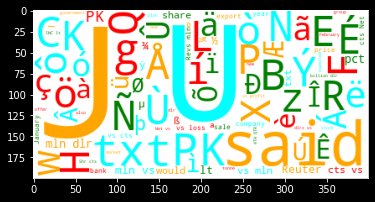

In [11]:
# Definição das cores que serão utilizados na nuvem de palavras
mapa_cores = ListedColormap(['orange','green','red','cyan'])
# criação da nuvem de palavras, com no máximo 100 palavras e utilizando as stop words
nuvem = WordCloud(
    background_color='white', colormap=mapa_cores, stopwords=stops, max_words=100 
)
# Criação e visualização da nuvem de palavras
nuvem.generate(todo_texto)
plt.imshow(nuvem)

In [12]:
# Criação de nova lista de palavras, removendo stop words
palavras_semstop = [p for p in palavras if p not in stops]
len(palavras_semstop)

555712

In [13]:
# Remoção da pontuação, gerando uma lista sem stop words e sem pontuação 
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]
len(palavras_sem_pontuacao)

492087

In [14]:
# Cálculo da frequência das palavras e visualização das mais comuns
frequencia = nltk.FreqDist(palavras_sem_pontuacao)
frequencia

FreqDist({'¸': 3886, 'said': 3398, '3': 2836, '0': 2728, 'mln': 2724, '1': 2321, 'vs': 2201, 'J': 2145, 'dlrs': 1946, '000': 1641, ...})

In [15]:
# Mais comuns
mais_comuns = frequencia.most_common(100)
mais_comuns

[('¸', 3886),
 ('said', 3398),
 ('3', 2836),
 ('0', 2728),
 ('mln', 2724),
 ('1', 2321),
 ('vs', 2201),
 ('J', 2145),
 ('dlrs', 1946),
 ('000', 1641),
 ('2', 1584),
 ('txtPK', 1558),
 ('&#', 1466),
 (";',", 1432),
 ('The', 1429),
 ('U', 1422),
 ('S', 1414),
 ('PK', 1397),
 ('cts', 1374),
 ('\x00\x00\x00', 1318),
 ('4', 1296),
 ('lt', 1288),
 ('5', 1274),
 ('Reuter', 1214),
 ('\x10', 1181),
 ('pct', 1147),
 ('6', 1117),
 ('\x00', 1117),
 ('8', 1111),
 ('\x0f', 1087),
 ('7', 1080),
 ('\x14', 1072),
 ('\x91', 1048),
 ('\x08', 1041),
 ('\x83', 1041),
 ('9', 1039),
 ('\x03', 1039),
 ('\x9e', 995),
 ('\x92', 993),
 ('÷', 991),
 ('\x06', 975),
 ('\x05', 967),
 ('\x8e', 963),
 ('¶', 962),
 ('\x1b', 962),
 ('\x90', 960),
 ('\x93', 960),
 ('\x18', 949),
 ('\x94', 945),
 ('\x07', 945),
 ('\x8b', 942),
 ('\x8d', 941),
 ('\x9a', 936),
 ('±', 933),
 ('\x0e', 929),
 ('ï', 924),
 ('A', 923),
 ('\x1a', 922),
 ('\x9d', 912),
 ('´', 911),
 ('\x16', 910),
 ('\x81', 910),
 ('»', 906),
 ('\x82', 906),
 ('\x